<a href="https://colab.research.google.com/github/Nacho2904/pasantiacsc/blob/main/regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresión logística

## Parcialitos

- 1) Usando "loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)", programar
con keras el GD. Indicar el learning rate, el patience del early stopping y el riesgo empírico finalmente alcanzado.

In [85]:
!wget https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/parcialitos.txt

--2022-09-06 16:01:06--  https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/parcialitos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘parcialitos.txt.2’

parcialitos.txt.2   100%[===================>]   3.69K  --.-KB/s    in 0s      

2022-09-06 16:01:06 (61.1 MB/s) - ‘parcialitos.txt.2’ saved [3775/3775]



In [142]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib as plt
dataset = pd.read_table("parcialitos.txt", sep=',',header=None)
dataset.columns = ["nota_primer_parcialito", "nota_segundo_parcialito", "aprobo"]
dataset[dataset["aprobo"] == 0]

,nota_primer_parcialito,nota_segundo_parcialito,aprobo
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0
11,75.013658,30.603263,0
14,39.538339,76.036811,0
17,67.946855,46.678574,0
20,67.372028,42.838438,0
22,50.534788,48.855812,0


In [87]:
inputs = np.array(dataset[["nota_primer_parcialito", "nota_segundo_parcialito"]])
targets = np.array(dataset["aprobo"]).reshape(len(dataset),1)
model_parcialitos = tf.keras.Sequential()
model_parcialitos.add(tf.keras.layers.Dense(1, input_dim=2))
model_parcialitos.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [88]:
#entrenamos el modelo
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model_parcialitos.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0015),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                          metrics=["accuracy"])
hist = model_parcialitos.fit(x=inputs, y=targets, batch_size = len(dataset), epochs=100000,callbacks=[early_stop]);

Epoch 1/100000
1/1 [==============================] - 0s 237ms/step - loss: 75.3892 - accuracy: 0.4000
Epoch 2/100000
1/1 [==============================] - 0s 8ms/step - loss: 69.4203 - accuracy: 0.4000
Epoch 3/100000
1/1 [==============================] - 0s 6ms/step - loss: 63.4514 - accuracy: 0.4000
Epoch 4/100000
1/1 [==============================] - 0s 10ms/step - loss: 57.4826 - accuracy: 0.4000
Epoch 5/100000
1/1 [==============================] - 0s 7ms/step - loss: 51.5137 - accuracy: 0.4000
Epoch 6/100000
1/1 [==============================] - 0s 8ms/step - loss: 45.5448 - accuracy: 0.4000
Epoch 7/100000
1/1 [==============================] - 0s 7ms/step - loss: 39.5759 - accuracy: 0.4000
Epoch 8/100000
1/1 [==============================] - 0s 13ms/step - loss: 33.6071 - accuracy: 0.4000
Epoch 9/100000
1/1 [==============================] - 0s 9ms/step - loss: 27.6382 - accuracy: 0.4000
Epoch 10/100000
1/1 [==============================] - 0s 6ms/step - loss: 21.7092 - ac

- 2) El comando compile puede recibir, a demás de optimizer y loss, métricás adicionales. Incorpore "metrics=[’accuracy’]” al mismo e indique el porcentaje de predicciones correctas con el conjunto de train (el único que hay) una vez finalizado el
entrenamiento.
- 3) Grafique el riesgo empírico y el porcentaje de clasificaciones correctas en función
de los epochs.

In [89]:
losses = np.array(hist.history['loss'])
accuracy = np.array(hist.history['accuracy'])

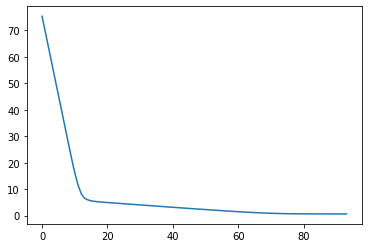

In [91]:
x_axis = np.arange(0,len(losses),1)
sns.lineplot(x=x_axis,y=losses);

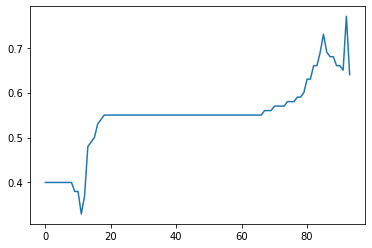

In [92]:
x_axis = np.arange(0,len(losses),1)
sns.lineplot(x=x_axis,y=accuracy);

- 4) Predecir si un estudiante con notas de (63, 55) va a aprobar.

In [108]:
y_prob = model_parcialitos.predict([[63,55]]) 
y_class = y_prob.argmax(axis=-1)
y_class

array([0])

Ergo, el nuestra predicción nos dice que el alumno no va a aprobar

- 5) Hacer un scatter plot con los datos, ploteando las dos clases con colores diferentes
y denotanto las etiquetas en el gráfico. Superponer sobre el mismo la frontera de
decisión.

In [125]:
weights = model_parcialitos.get_weights()
weights

[array([[0.00561242],
        [0.00172034]], dtype=float32), array([0.00231406], dtype=float32)]

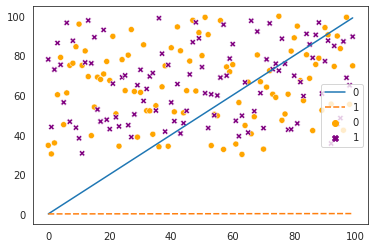

In [141]:
x_axis = np.arange(0,np.max(inputs),1).reshape(len(x_axis),1)
y_axis = np.array([weights[0][0] + weights[0][1]*x for x in x_axis])
sns.scatterplot(data=inputs,marker='o',palette=["orange","purple"])
sns.lineplot(data=np.append(x_axis,y_axis,axis=1));